In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,  Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2
from joblib import Parallel, delayed
import os
import csv
import random

2023-06-12 23:01:47.837475: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-12 23:01:47.842804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 23:01:47.941088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 23:01:47.942372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 23:01:49.751600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
# Definir los directorios que contienen los diferentes tipos de imágenes
dirlist = [
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___Cedar_apple_rust',
    'Plant_leave_diseases_dataset_without_augmentation/Apple___healthy',
    "Plant_leave_diseases_dataset_without_augmentation/Blueberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Cherry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Cherry___Powdery_mildew",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Cercospora_leaf_spot Gray_leaf_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Common_rust",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Corn___Northern_Leaf_Blight",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Black_rot",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Esca_(Black_Measles)",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Plant_leave_diseases_dataset_without_augmentation/Orange___Haunglongbing_(Citrus_greening)",
    "Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Peach___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Pepper,_bell___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Pepper,_bell___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___Early_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Potato___Late_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Raspberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Soybean___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Squash___Powdery_mildew",
    "Plant_leave_diseases_dataset_without_augmentation/Strawberry___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Strawberry___Leaf_scorch",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Bacterial_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Early_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___healthy",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Late_blight",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Leaf_Mold",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Septoria_leaf_spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Spider_mites Two-spotted_spider_mite",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Target_Spot",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_mosaic_virus",
    "Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

# Crear un diccionario que mapea las etiquetas a los índices
label_map = {
    'Apple_scab': 0,
    'Apple_rot': 1,
    'Apple_cedar': 2,
    'Apple_healhty': 3,
    'Blueberry': 4,
    'Cherry_healhty': 5,
    'Cherry_powdery': 6,
    'Corn_cercopora': 7,
    'Corn_common': 8,
    'Corn_healthy': 9,
    'Corn_northern': 10,
    'Grape_rot': 11,
    'Grape_esca': 12,
    'Grape_healthy': 13,
    'Grape_leaf': 14,
    'Orange': 15,
    'Peach_spot': 16,
    'Peach_healthy': 17,
    'Pepper_spot': 18,
    'Pepper_healthy': 19,
    'Potato_early_blight': 20,
    'Potato_healthy': 21,
    'Potato_late_blight': 22,
    'Raspberry': 23,
    'Soybean': 24,
    'Squash': 25,
    'Strawberry_healthy': 26,
    'Strawberry_scorch': 27,
    'Tomato_bacterial': 28,
    'Tomato_early_blight': 29,
    'Tomato_healthy': 30,
    'Tomato_late_blight': 31,
    'Tomato_mold': 32,
    'Tomato_septoria': 33,
    'Tomato_spider': 34,
    'Tomato_target': 35,
    'Tomato_mosaic': 36,
    'Tomato_yellow': 37,
}

# Crear dos listas vacías para almacenar los paths de archivo y las etiquetas
filepaths = []
labels = []

# Iterar a través de los directorios y agregar los paths de archivo y las etiquetas a las listas creadas anteriormente
for idx, d in enumerate(dirlist):
    flist = os.listdir(d)
    for f in flist:
        fpath = os.path.join(d, f)
        filepaths.append(fpath)
        labels.append(list(label_map.keys())[idx])

# Crear un dataframe con los paths de archivo y las etiquetas
df = pd.DataFrame({'Ruta': filepaths, 'Label': labels})

# Reorganizar el dataframe a un formato legible y guardarlo en un archivo CSV
df.to_csv('Data.csv', index=False)

# Contar el número de imágenes en cada clase de etiqueta y mostrar los resultados
print(df['Label'].value_counts())

# Mostrar las primeras filas del dataframe
df.head()

In [ ]:
############################## Vamos a reducir la cantidad de imagenes

data = {}
with open('Data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Ignorar la primera línea si contiene encabezados
    for row in csv_reader:
        ruta_imagen = row[0]
        etiqueta = row[1]

        if etiqueta not in data:
            data[etiqueta] = []
        data[etiqueta].append(ruta_imagen)

# Reducir la cantidad de elementos por etiqueta a un máximo de 370
max_cantidad = 370
for etiqueta, rutas_imagenes in data.items():
    cantidad_actual = len(rutas_imagenes)
    if cantidad_actual > max_cantidad:
        rutas_imagenes_reducidas = random.sample(rutas_imagenes, max_cantidad)
        data[etiqueta] = rutas_imagenes_reducidas

# Guardar los resultados en un nuevo archivo CSV
with open('New_data.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Ruta', 'Label'])
    for etiqueta, rutas_imagenes in data.items():
        for ruta_imagen in rutas_imagenes:
            csv_writer.writerow([ruta_imagen, etiqueta])


In [2]:
# Cargar el archivo CSV con las rutas y etiquetas
data = pd.read_csv('New_data.csv')

# Contar el número de imágenes en cada clase de etiqueta y mostrar los resultados
print(data['Label'].value_counts())

# Mostrar las primeras filas del dataframe
data.head()

##############################

dimAncho= 32
dimLargo= 32

##############################

# Son 13367 imagenes totales

Apple_scab             370
Apple_rot              370
Potato_late_blight     370
Raspberry              370
Soybean                370
Squash                 370
Strawberry_healthy     370
Strawberry_scorch      370
Tomato_bacterial       370
Tomato_early_blight    370
Tomato_healthy         370
Tomato_late_blight     370
Tomato_mold            370
Tomato_septoria        370
Tomato_spider          370
Tomato_target          370
Tomato_mosaic          370
Potato_early_blight    370
Pepper_healthy         370
Pepper_spot            370
Corn_healthy           370
Apple_healhty          370
Blueberry              370
Cherry_healhty         370
Cherry_powdery         370
Corn_cercopora         370
Corn_common            370
Corn_northern          370
Grape_rot              370
Grape_esca             370
Grape_healthy          370
Grape_leaf             370
Orange                 370
Peach_spot             370
Tomato_yellow          370
Peach_healthy          360
Apple_cedar            275
P

In [ ]:
############################## Ver las dimensiones unicas de estas imagenes

# Cargar el archivo CSV con las rutas y etiquetas
data = pd.read_csv('New_data.csv')

# Crear un conjunto para almacenar las dimensiones únicas
dimensiones_unicas = set()

# Iterar sobre las rutas de las imágenes y obtener sus dimensiones
for ruta in data['Ruta']:
    # Leer la imagen utilizando OpenCV
    imagen = cv2.imread(ruta)
    
    # Obtener las dimensiones de la imagen
    altura, ancho, canales = imagen.shape
    
    # Agregar las dimensiones al conjunto de dimensiones únicas
    dimensiones_unicas.add((altura, ancho, canales))

# Imprimir las dimensiones únicas
for dimension in dimensiones_unicas:
    altura, ancho, canales = dimension
    print(f"Dimensiones únicas: {altura}x{ancho} con {canales} canales")


# Preparar los datos

In [3]:
# Preprocess the images
def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (dimAncho, dimLargo))
    img = img / 255.0
    return img

# Preprocess the images in parallel
def preprocess_image_parallel(file_paths):
    return Parallel(n_jobs=8)(delayed(preprocess_image)(file_path) for file_path in file_paths)


# Autoencoder

In [4]:
# Define the autoencoder model
def build_autoencoder(congelados):
    # Define the input shape for the images
    input_img = Input(shape=(dimAncho, dimLargo, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the autoencoder model by specifying the input and output layers
    autoencoder = Model(input_img, decoded)
    # Set whether the layers of the autoencoder are trainable or frozen based on the 'congelados' parameter
    autoencoder.trainable = congelados
    # Compile the autoencoder model with the Adam optimizer and mean squared error loss function
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    # Return the compiled autoencoder model
    return autoencoder

# CNN

In [5]:
# Define the CNN model
def build_cnn():
    # Crear un modelo secuencial
    model = Sequential()

    # Agregar una capa convolucional 2D con 32 filtros, un tamaño de kernel (3, 3) y función de activación ReLU
    # La capa espera una entrada de forma (dimAncho, dimLargo, 3)
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(dimAncho, dimLargo, 3)))
    
    # Agregar una capa de max pooling con tamaño de pool (2, 2)
    model.add(MaxPooling2D((2, 2)))

    # Agregar otra capa convolucional 2D con 64 filtros y función de activación ReLU
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Agregar otra capa de max pooling con tamaño de pool (2, 2)
    model.add(MaxPooling2D((2, 2)))

    # Aplanar la salida de las capas anteriores para alimentarla a capas completamente conectadas
    model.add(Flatten())

    # Agregar una capa densa con 128 neuronas y función de activación ReLU
    model.add(Dense(128, activation='relu'))

    # Agregar una capa densa de salida con 38 neuronas y función de activación softmax
    # Esto se asume como un problema de clasificación con 38 clases
    model.add(Dense(38, activation='softmax'))

    # Devolver el modelo construido
    return model

# Ejecucion 1

In [7]:
# Read the data from the CSV file
data = pd.read_csv("New_data.csv")

# Split the data into autoencoder and resto
autoencoder_data, resto_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract the "Ruta" column for autoencoder
autoencoder_images = autoencoder_data["Ruta"]

# Preprocess the autoencoder images
X_autoencoder = np.array(preprocess_image_parallel(autoencoder_images))

# Split the resto data into features (X) and labels (y)
X = resto_data['Ruta']
y = resto_data['Label']

# Encode the labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Preprocess the training and testing images
X_train = np.array(preprocess_image_parallel(X_train))
X_test = np.array(preprocess_image_parallel(X_test))


Clasificador A

Epoch 1/10
35/35 [==============================] - 3s 45ms/step - loss: 3.6278 - accuracy: 0.0318 - val_loss: 3.6050 - val_accuracy: 0.0364
Epoch 2/10
35/35 [==============================] - 1s 34ms/step - loss: 3.4154 - accuracy: 0.1137 - val_loss: 3.3315 - val_accuracy: 0.0873
Epoch 3/10
35/35 [==============================] - 1s 35ms/step - loss: 2.8711 - accuracy: 0.2275 - val_loss: 2.7967 - val_accuracy: 0.2291
Epoch 4/10
35/35 [==============================] - 1s 33ms/step - loss: 2.3004 - accuracy: 0.3767 - val_loss: 2.2373 - val_accuracy: 0.3636
Epoch 5/10
35/35 [==============================] - 1s 34ms/step - loss: 1.9102 - accuracy: 0.4540 - val_loss: 2.1076 - val_accuracy: 0.4000
Epoch 6/10
35/35 [==============================] - 1s 35ms/step - loss: 1.6668 - accuracy: 0.5141 - val_loss: 1.9440 - val_accuracy: 0.4400
Epoch 7/10
35/35 [==============================] - 1s 33ms/step - loss: 1.4035 - accuracy: 0.6024 - val_loss: 1.8534 - val_accuracy: 0.4655
Epoch 8/10
35

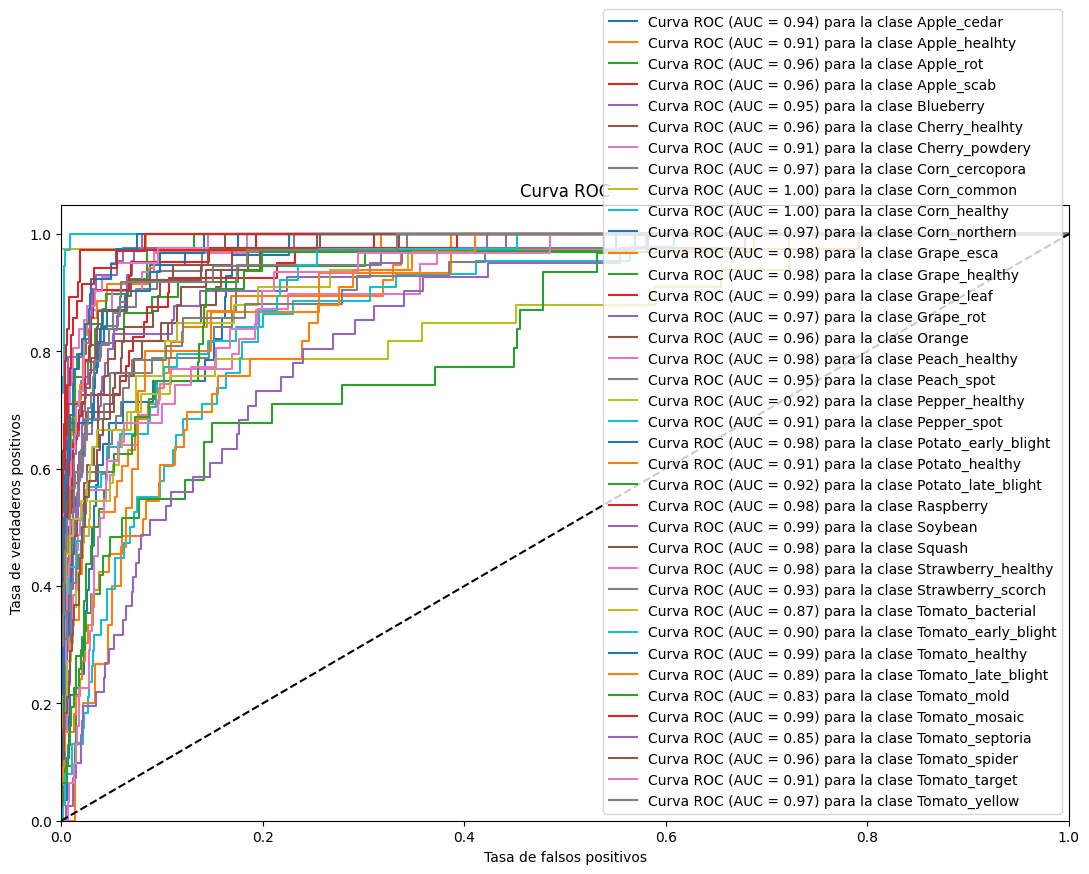

In [8]:
# Build del CNN model
cnn = build_cnn()

# Compile el CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador B

Epoch 1/10
344/344 [==============================] - 12s 34ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 2/10
344/344 [==============================] - 14s 40ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 3/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 4/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 5/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 6/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 7/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 8/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 9/10
344/344 [==============================] - 11s 31ms/step - loss: 0.0405 - val_loss: 0.0407
Epoch 10/10
344/344 [==============================] - 11s 31ms/step - loss: 0.040

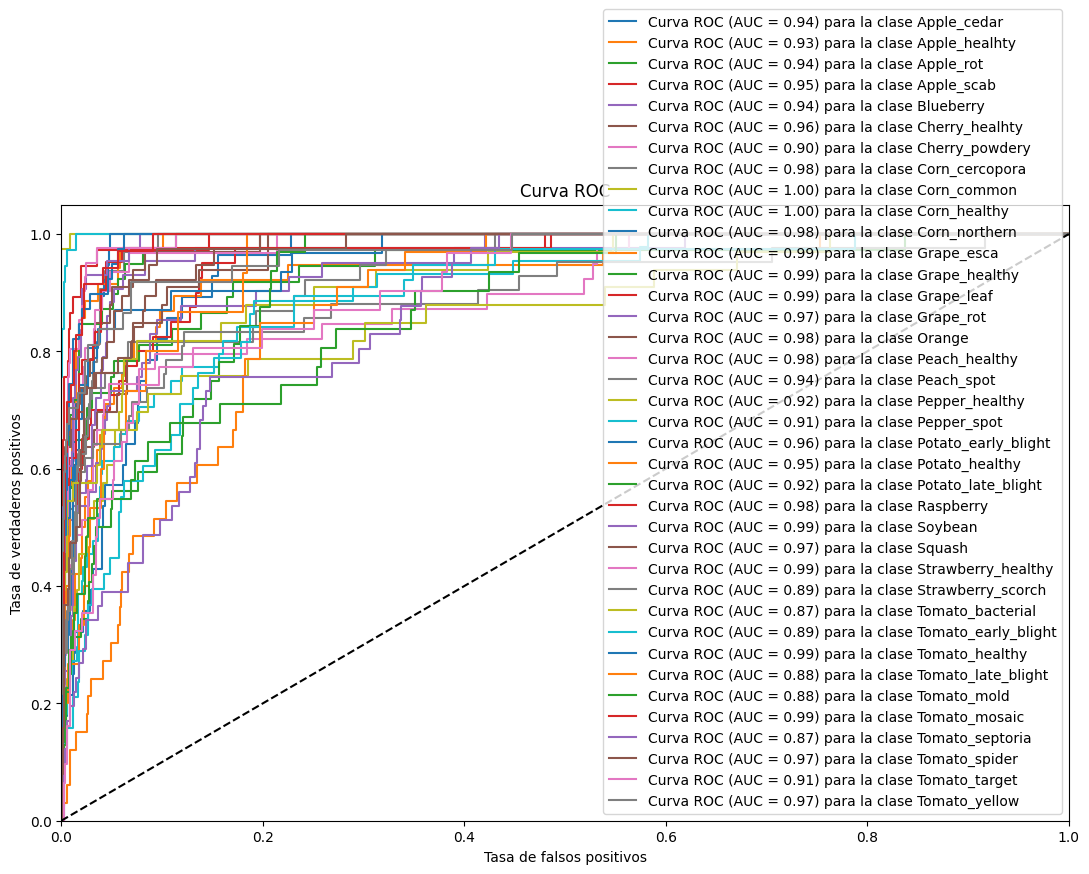

In [9]:
# Build el CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(False)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)


# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador c

Epoch 1/10
344/344 [==============================] - 25s 68ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 2/10
344/344 [==============================] - 23s 68ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 3/10
344/344 [==============================] - 21s 61ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/10
344/344 [==============================] - 21s 60ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/10
344/344 [==============================] - 20s 59ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/10
344/344 [==============================] - 20s 59ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/10
344/344 [==============================] - 21s 62ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/10
344/344 [==============================] - 24s 71ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
344/344 [==============================] - 22s 64ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
344/344 [==============================] - 23s 68ms/step - loss: 0.001

/home/daval/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daval/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daval/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


43/43 [==============================] - 1s 12ms/step


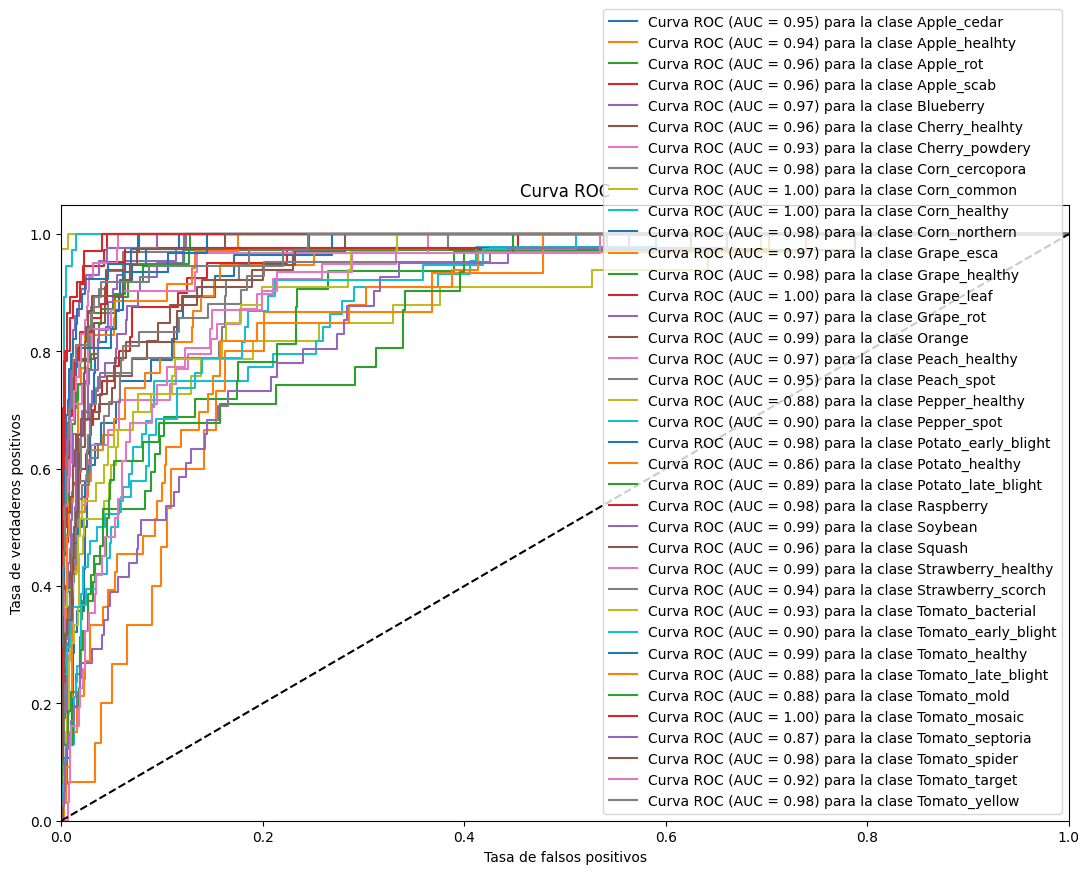

In [10]:

# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(True)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# Ejecución 2

In [6]:
# Read the data from the CSV file
data = pd.read_csv("New_data.csv")

# Split the data into autoencoder and resto
autoencoder_data, resto_data = train_test_split(data, test_size=0.5, random_state=42)

# Extract the "Ruta" column for autoencoder
autoencoder_images = autoencoder_data["Ruta"]

# Preprocess the autoencoder images
X_autoencoder = np.array(preprocess_image_parallel(autoencoder_images))

# Split the resto data into features (X) and labels (y)
X = resto_data['Ruta']
y = resto_data['Label']

# Encode the labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

# Preprocess the training and testing images
X_train = np.array(preprocess_image_parallel(X_train))
X_test = np.array(preprocess_image_parallel(X_test))

Clasificador D

Epoch 1/10
52/52 [==============================] - 4s 41ms/step - loss: 3.5672 - accuracy: 0.0698 - val_loss: 3.2951 - val_accuracy: 0.1456
Epoch 2/10
52/52 [==============================] - 2s 34ms/step - loss: 2.8668 - accuracy: 0.2549 - val_loss: 2.3601 - val_accuracy: 0.3932
Epoch 3/10
52/52 [==============================] - 2s 35ms/step - loss: 2.0254 - accuracy: 0.4345 - val_loss: 2.0760 - val_accuracy: 0.4126
Epoch 4/10
52/52 [==============================] - 2s 34ms/step - loss: 1.6094 - accuracy: 0.5449 - val_loss: 1.7925 - val_accuracy: 0.4660
Epoch 5/10
52/52 [==============================] - 2s 34ms/step - loss: 1.4222 - accuracy: 0.5783 - val_loss: 1.6892 - val_accuracy: 0.5000
Epoch 6/10
52/52 [==============================] - 2s 34ms/step - loss: 1.0998 - accuracy: 0.6784 - val_loss: 1.5081 - val_accuracy: 0.5607
Epoch 7/10
52/52 [==============================] - 2s 33ms/step - loss: 0.9730 - accuracy: 0.7039 - val_loss: 1.4096 - val_accuracy: 0.5680
Epoch 8/10
52

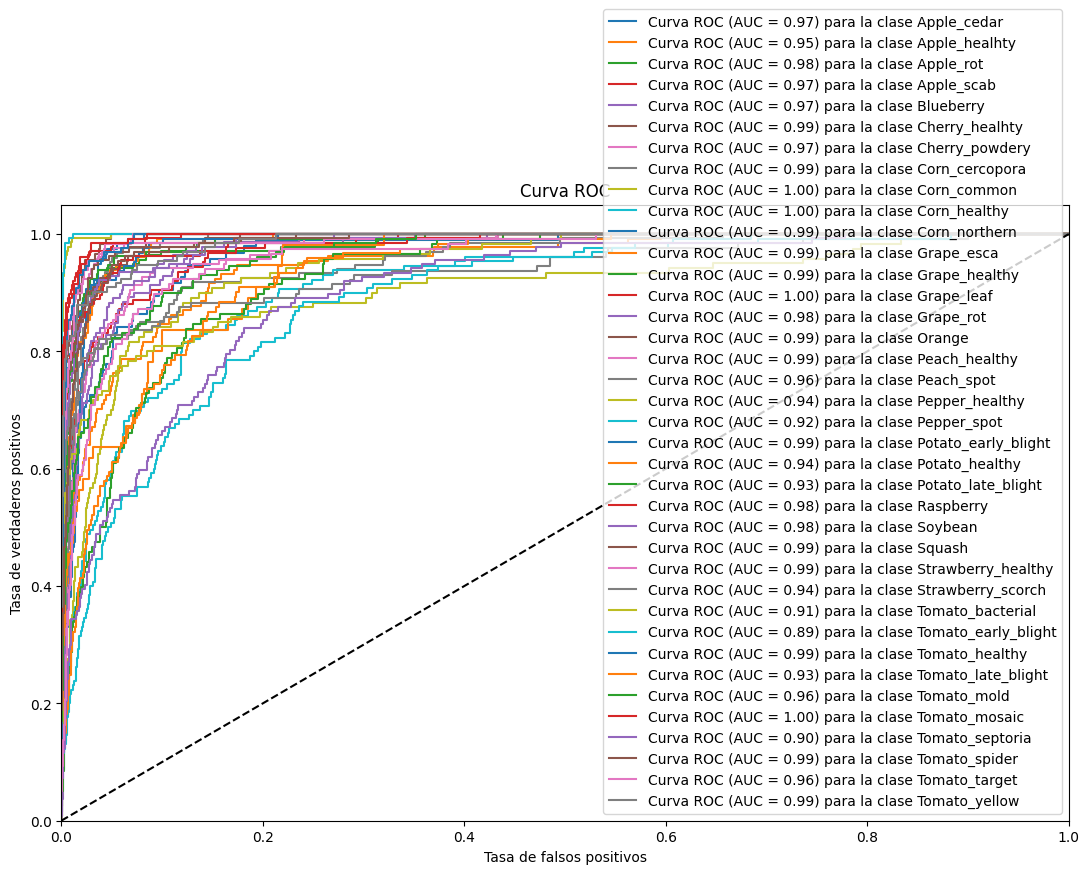

In [7]:
# Build the CNN model
cnn = build_cnn()

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador E

Epoch 1/10
215/215 [==============================] - 11s 49ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 2/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 3/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 4/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 5/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 6/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 7/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 8/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 9/10
215/215 [==============================] - 10s 47ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 10/10
215/215 [==============================] - 10s 47ms/step - loss: 0.037

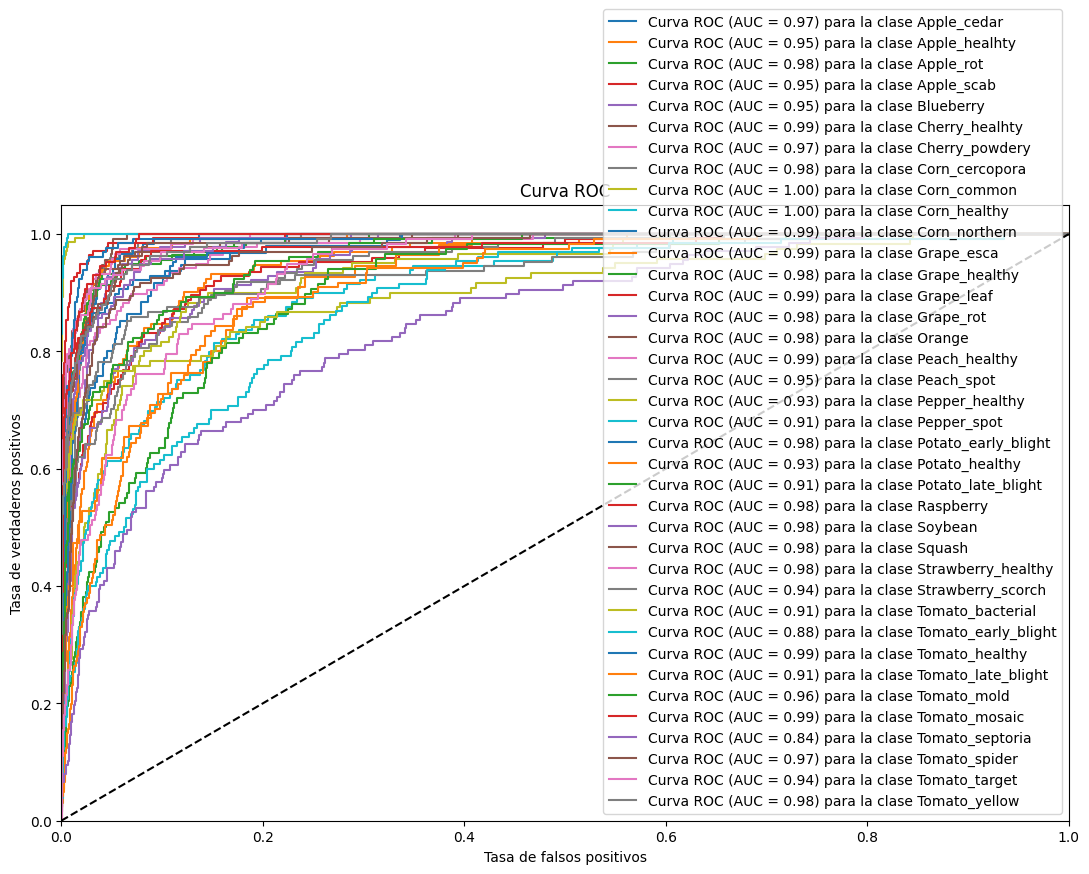

In [8]:
# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(False)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)


# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Clasificador F

Epoch 1/10
215/215 [==============================] - 18s 77ms/step - loss: 0.0095 - val_loss: 0.0045
Epoch 2/10
215/215 [==============================] - 17s 79ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 3/10
215/215 [==============================] - 17s 80ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/10
215/215 [==============================] - 18s 82ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/10
215/215 [==============================] - 17s 78ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/10
215/215 [==============================] - 16s 77ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 8/10
215/215 [==============================] - 16s 77ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 10/10
215/215 [==============================] - 17s 81ms/step - loss: 0.002

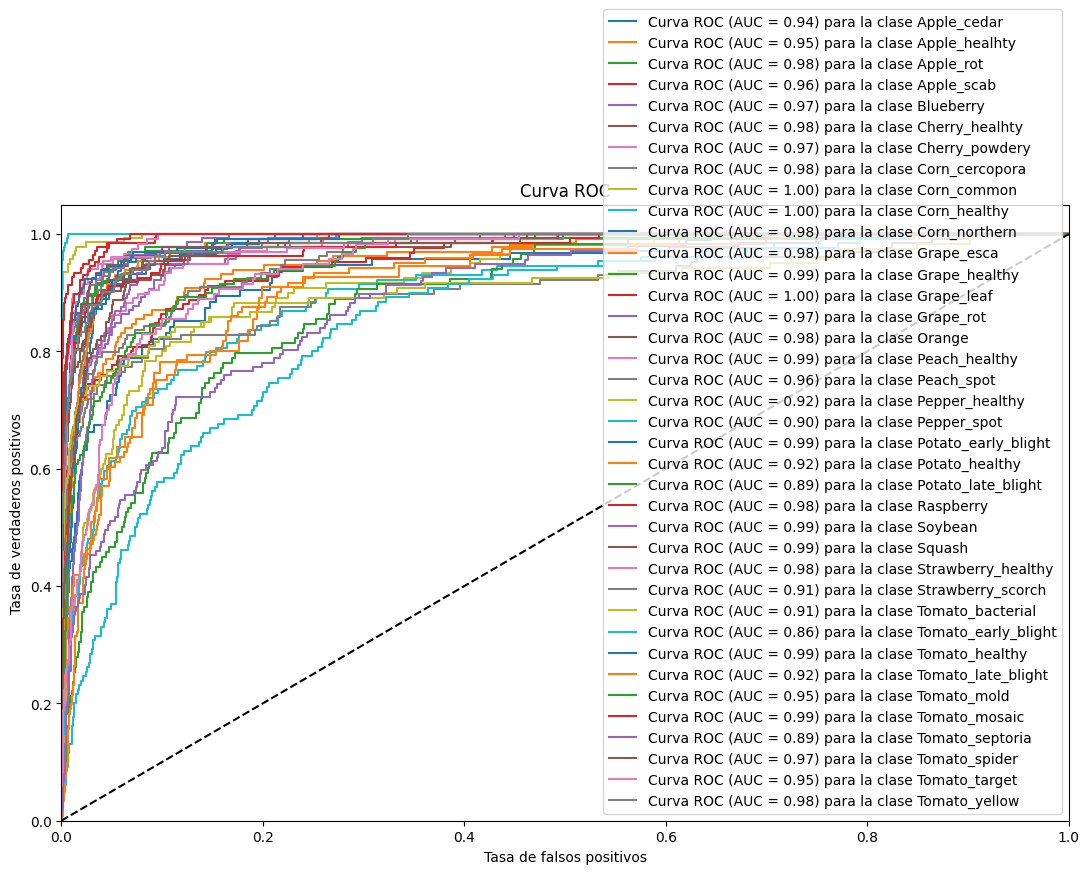

In [9]:

# Build the CNN model
cnn = build_cnn()

# Build and train the autoencoder
autoencoder = build_autoencoder(True)
autoencoder.fit(X_autoencoder, X_autoencoder, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Guardar los pesos del autoencoder en un archivo
autoencoder.save_weights('autoencoder_weights.h5')

# Load the weights of the autoencoder
cnn.load_weights('autoencoder_weights.h5', by_name=True)

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Realiza las predicciones con el modelo entrenado
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtiene los nombres de las clases codificados previamente
class_names = label_encoder.classes_

# Decodifica las etiquetas de prueba
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

# Genera el informe de clasificación
classification_rep = classification_report(y_test_decoded, y_pred_decoded, target_names=class_names)

print(classification_rep)

# Obtener las probabilidades de predicción para cada clase
y_pred_proba = cnn.predict(X_test)

fpr = dict()  # Tasa de falsos positivos
tpr = dict()  # Tasa de verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)

# Calcular la curva ROC y el AUC para cada clase
for i in range(38):  # Suponiendo que tienes 4 clases
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(13,8))
for i in range(38):  # Suponiendo que tienes 4 clases
    plt.plot(fpr[i], tpr[i], label='Curva ROC (AUC = %0.2f) para la clase %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
